<font size=6>
Линейная регрессия

Выполнил - Карабалин Руслан

# Введение

Цель работы - предсказание стоимости коттеджа по его площади и другим характеристик с помощью линейной модели регрессионного анализа.

Описание переменных

PRICE — стоимость коттеджа в тысячах долларов США.

HOUSE — площадь коттеджа в квадратных метрах.

AREA — площадь участка в сотках.

DIST — расстояние от расположения коттеджа до кольцевой автомобильной дороги в километрах.

ECO — индикатор, принимающий значение 1, если рядом с коттеджем есть река или озеро, и значение 0 в противном случае.

Подключение библиотек pandas, matplotlib.pyplot, numpy, scipy.stats:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Подключение необходимых инструментов из пакета scikit-learn:

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Импортирование данных:

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
ds = pd.read_excel("/content/drive/MyDrive/python/ml/lab3/ML.ds3.xlsx", "V(31)", header=1)
ds.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Price,House,Area,Dist,Eco
0,27.0,130,6.0,12.0,0
1,270.0,350,15.0,15.0,1
2,96.0,300,15.0,39.0,0
3,95.0,200,14.0,25.0,0
4,6.0,36,6.0,65.0,0


Выделение из полученной таблицы в переменную y1 - значения зависимой переменной, в переменную X1 - матрицу данных исходных признаков:

In [6]:
y1 = ds["Price"]
X1 = ds[["House", "Area", "Dist", "Eco"]]

Разделим данные на обучающую (80%) и тестовую (20%) части:

In [7]:
X1train, X1test, y1train, y1test = train_test_split(X1, y1, test_size=0.2, random_state=69)

# Обучение модели

Создадим модель линейной регрессии:

In [8]:
modlin = LinearRegression()

Обучим модель:

In [9]:
m1 = modlin.fit(X1train, y1train)

Посмотрим на результат обучения. Оценки коэффициентов для каждого признака:

In [10]:
m1.coef_

array([ 0.14925206,  4.03723779, -0.56649602, 34.0271367 ])

Оценка свободного коэффициента:

In [11]:
m1.intercept_

-3.9752580021989132

Уравнение модели с получившимися коэффициентами:

$$\text{Price} = 0,15\cdot \text{House} + 4,04\cdot \text{Area} - 0,57\cdot\text{Dist} + 34,03\cdot\text{Eco} - 3,98$$

# Тестирование модели

Выполним предсказание значений целевой функции на обучающей выборке:

In [12]:
y1trainpred = m1.predict(X1train)

Вычислим остатки:

In [13]:
e1train = y1train - y1trainpred

Построим точечную диаграмму остатков:

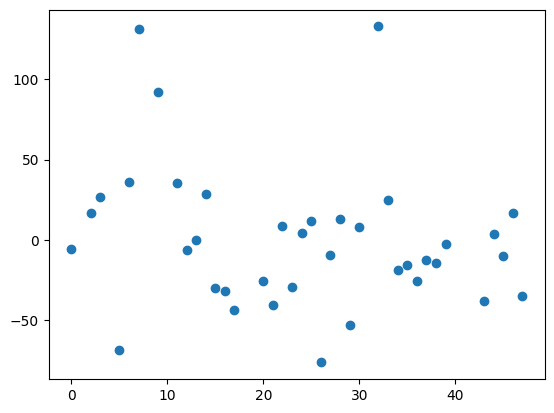

In [14]:
plt.scatter(e1train.index, e1train)
plt.show()

На диаграмме видно, что имеется достаточно много больших остатков относительно размера обучающей выборки.

Вычислим коэффициент детерминации:

In [15]:
rsqm1train = metrics.explained_variance_score(y1train, y1trainpred)
rsqm1train

0.6718394842157168

Коэффициент детерминации меньше 0,8, что означает, что модель недостаточно хорошо описывает данные.

Выполним предсказание значений целевой функции на тестовой выборке:

In [16]:
y1testpred = m1.predict(X1test)

Вычислим остатки:

In [17]:
e1test = y1test - y1testpred

Построим точечную диаграмму остатков:

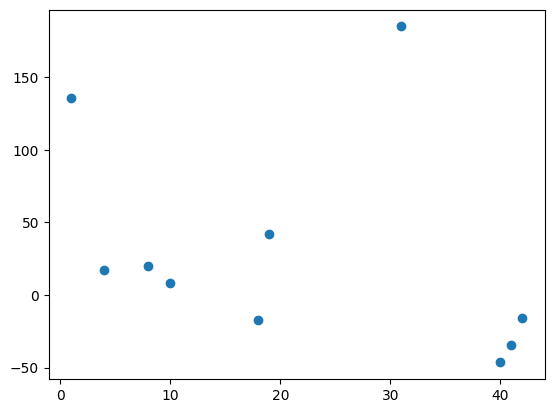

In [18]:
plt.scatter(e1test.index, e1test)
plt.show()

На диаграмме видно, что имеется достаточно много больших остатков, относительно размера тестовой выборки это означает, что модель недостаточно хорошо описывает тестовую выборку.

Вычислим коэффициент детерминации:

In [19]:
rsqm1test = metrics.explained_variance_score(y1test, y1testpred)
rsqm1test

0.5690312132250395

Коэффициент детерминации меньше 0,8, что показывает невысокое качество модели на тестовой выборке.

Итого, коэффициенты детерминации на обучающей выборке (0.67) и на тестовой выборке (0.57) примерно равны. Это означает, что модель недообучилась.

# Улучшение качества модели

## Очистка данных

Построим диаграмму boxplot для стоимости коттеджа:

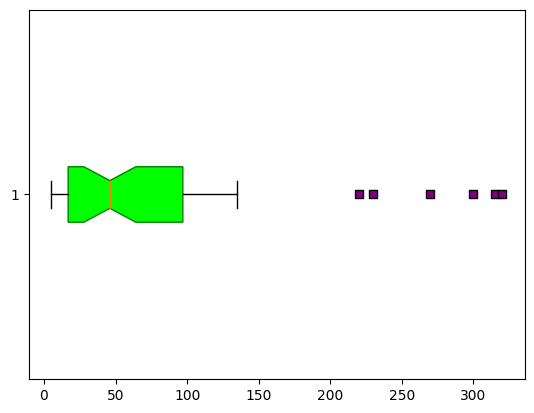

In [20]:
plt.boxplot(ds.Price, vert = False, notch = True, patch_artist = True,
            flierprops = dict(markerfacecolor = 'purple', marker = 's'),
            boxprops = dict(color = 'green', facecolor = 'lime' ))
plt.show()

Имеем 6 кандидатов на выбросы:

In [21]:
ds.query("Price > 200")

,Price,House,Area,Dist,Eco
1,270.0,350,15.0,15.0,1
7,315.0,450,25.0,25.0,1
9,230.0,350,18.0,30.0,1
16,220.0,500,40.0,26.0,1
31,320.0,300,15.0,0.5,1
32,300.0,400,22.0,20.0,1


Удалим аномальные данные (четыре записи - 1, 7, 31, 32):

In [22]:
ds2 = ds[ds["Price"] <= 250]

Выделим целевую переменную и матрицу признаков после удаления аномальных данных:

In [23]:
y2 = ds2["Price"]
X2 = ds2[["House", "Area", "Dist", "Eco"]]

Обучим модель на наших данных:

In [24]:
m2 = modlin.fit(X2, y2)

Выполним предсказание значений целевой функции:

In [25]:
y2pred = m2.predict(X2)

Вычислим коэффициент детерминации:

In [26]:
rsqm2train = metrics.explained_variance_score(y2, y2pred)
rsqm2train

0.7184122914756524

Коэффициент детерминации новой модели меньше 0,8, поэтому вычисляем остатки:

In [27]:
e2pred = y2 - y2pred

Найдем строку с наибольшим по модулю остатком:

In [28]:
e2pred[e2pred == e2pred.abs().max()]

9    117.240339
Name: Price, dtype: float64

Удалим ее из нашего набора данных:

In [29]:
ds3 = ds2.drop(index = e2pred[e2pred == e2pred.abs().max()].index)

Выделим целевую переменную и матрицу признаков после удаления аномальных данных:

In [30]:
y3 = ds3["Price"]
X3 = ds3[["House", "Area", "Dist", "Eco"]]

Обучим модель на наших данных:

In [31]:
m3 = modlin.fit(X3, y3)

Выполним предсказание значений целевой функции:

In [32]:
y3pred = m3.predict(X3)

Вычислим коэффициент детерминации:

In [33]:
rsqm3train = metrics.explained_variance_score(y3, y3pred)
rsqm3train

0.7857111342849201

Коэффициент детерминации новой модели меньше 0,8, поэтому вычисляем остатки:

In [34]:
e3pred = y3 - y3pred

Найдем строку с наибольшим по модулю остатком:

In [35]:
e3pred[e3pred == e3pred.abs().max()]

19    57.892414
Name: Price, dtype: float64

Удалим ее из нашего набора данных:

In [36]:
ds4 = ds3.drop(index = e3pred[e3pred == e3pred.abs().max()].index)

Выделим целевую переменную и матрицу признаков после удаления аномальных данных:

In [37]:
y4 = ds4["Price"]
X4 = ds4[["House", "Area", "Dist", "Eco"]]

Обучим модель на наших данных:

In [38]:
m4 = modlin.fit(X4, y4)

Выполним предсказание значений целевой функции:

In [39]:
y4pred = m4.predict(X4)

Вычислим коэффициент детерминации:

In [40]:
rsqm4train = metrics.explained_variance_score(y4, y4pred)
rsqm4train

0.8151146040052643

Коэффициент детерминации новой модели больше 0,8, поэтому мы можем обучить ее заново, уже разделив данные на обучающую и тестовую части.

In [54]:
ds.shape[0], ds4.shape[0]

(48, 42)

В исходной выборке было 48 величин, после удаления 6 осталось 42.

## Обучение модели

Разделим данные на обучающую (80%) и тестовую (20%) части:

In [42]:
X4train, X4test, y4train, y4test = train_test_split(X4, y4, test_size=0.2, random_state=69)

Обучим модель на наших данных:

In [43]:
m5 = modlin.fit(X4train, y4train)

Посмотрим на результат обучения. Оценки коэффициентов для каждого признака:

In [44]:
m5.coef_

array([ 0.05794983,  4.31350004, -0.57642914,  9.68170315])

Оценка свободного коэффициента:

In [45]:
m5.intercept_

11.128615839956517

Уравнение модели с получившимися коэффициентами:

$$\text{Price} = 0,06\cdot \text{House} + 4,31\cdot \text{Area} - 0,58\cdot\text{Dist} + 9,68\cdot\text{Eco} +11,13$$

## Оценка качества модели

Выполним предсказание значений целевой функции на обучающей выборке:

In [46]:
y4trainpred = m5.predict(X4train)

Вычислим остатки:

In [47]:
e4train = y4train - y4trainpred

Построим точечную диаграмму остатков:

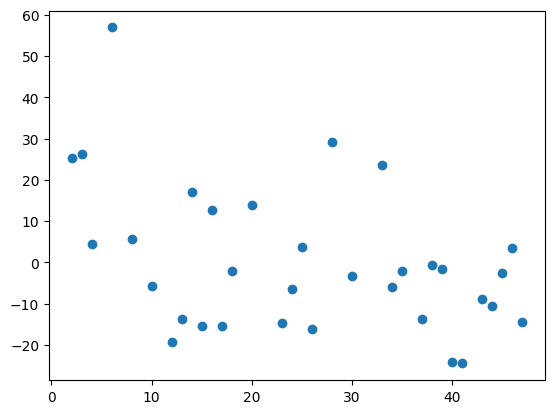

In [48]:
plt.scatter(e4train.index, e4train)
plt.show()

Исходя из диаграммы видно, что больших остатков относительно объема обучающей выборки не так много. Значит, качество модели на обучающей выборке является довольно высоким.

Вычислим коэффициент детерминации:

In [49]:
rsqm5train = metrics.explained_variance_score(y4train, y4trainpred)
rsqm5train

0.8554708563471891

Величина коэффицента детерминации больше 0.8, будем считать качество модели достаточно хорошим.

Выполним предсказание значений целевой функции на тестовой выборке:

In [50]:
y4testpred = m5.predict(X4test)

Вычислим остатки:

In [51]:
e4test = y4test - y4testpred

Построим точечную диаграмму остатков:

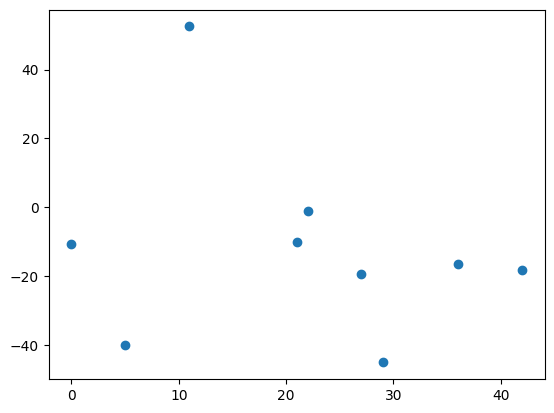

In [52]:
plt.scatter(e4test.index, e4test)
plt.show()

На диаграмме видно, что имеется много больших остатков, что означает, что модель недостаточно хорошо описывает тестовые данные.

In [53]:
rsqm5test = metrics.explained_variance_score(y4test, y4testpred)
rsqm5test

0.6952392256404492

Коэффициент детерминации меньше 0,8, что показывает низкое качество модели на тестовой выборке. Можно сделать вывод, что модель переобучилась.

# Заключение

Цель работы — предсказание стоимости коттеджа по его площади и другим характеристикам с помощью линейной модели регрессионного анализа.

Использованные пакеты: numpy, pandas, matplotlib, scipy, sklearn.

Во время подготовки данных мы разделили их на обучающую и тестовые части, далее обучили модель линейной регрессии. В ходе тестирования полученной модели выяснилось, что она недообучилась (получили низкие коэффициенты детерминации на обучающей и тестовой частях данных - 0,67 и 0,57 соответственно). Для улучшения качества модели мы провели очистку данных, отбросив аномальные значения, а потом удаляя строки с наибольшими остатками. В итоге получили коэффициенты детерминации 0,86 и 0,70 на новых обучающей и тестовой выборках, из чего следует, что полученная модель предсказания стоимости коттеджа переобучилась (получили высокий коэффициент детерминации на обучающей выборке, и низкий на тестовой).